In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
import os
import numpy as np
import string

In [6]:
# Onehot key for every word
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {} #Save the index in all samples
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10 # Only consider the first 10 words in every smaple
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1

In [49]:
# Onehot key for every character
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip( characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples),
                    max_length,
                    len(characters) + 1)) #max(token_index.keys()) + 1
for i , smaple in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1

In [54]:
# Use keras to imply word`s one-hotkey
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# We may get one-hot binary way of representation this may alse get other vectorize methods
word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index)) 

Found 9 unique tokens.


In [55]:
# Embedding layer for word embedding
from keras.layers import Embedding

embedding_layer = Embedding(1000,64)
# Embedding layer has at least 2 parameters: the numbers that are signature, here is 1000 which is the max word 
# index maximium +1 and embedd dimension which here is 64
# Embedding layer is like a layer with dictionary and finding

In [57]:
# IMDB datasets training
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [62]:
max_features = 10000 # as a feature`s words number
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)
# Pads sequences to the same length. which mean cut the unnecessary thing and add the to the

In [64]:
model = Sequential()
model.add(Embedding(1000, 8, input_length=maxlen))

model.add(Flatten()) #flatten the embedding tensor layer into (samples, maxlen * 8) this two layer

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             8000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size =32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 81us/step - loss: 0.6767 - acc: 0.6026 - val_loss: 0.6427 - val_acc: 0.6696
Epoch 2/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.5796 - acc: 0.7205 - val_loss: 0.5606 - val_acc: 0.7094
Epoch 3/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.5128 - acc: 0.7469 - val_loss: 0.5355 - val_acc: 0.7220
Epoch 4/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4868 - acc: 0.7621 - val_loss: 0.5302 - val_acc: 0.7270
Epoch 5/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4728 - acc: 0.7699 - val_loss: 0.5292 - val_acc: 0.7344
Epoch 6/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4635 - acc: 0.7763 - val_loss: 0.5323 - val_acc: 0.7328
Epoch 7/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4553 - acc: 0.7817 - val_loss: 0.5337 - val_acc:

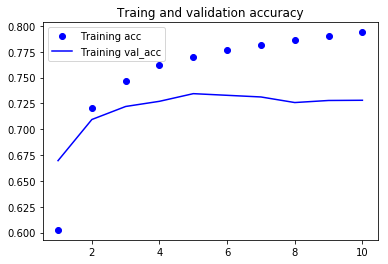

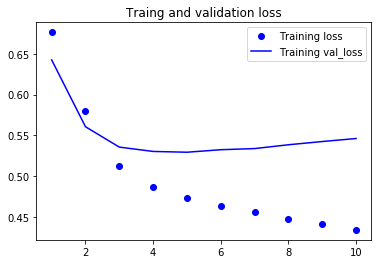

In [76]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 11)
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label='Training val_acc')
plt.title('Traing and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label='Training val_loss')
plt.title('Traing and validation loss')
plt.legend()

plt.show()

In [5]:
# A more complete imdb training with GloVe
# GloVe, global vectors for word representation is a pre-trained vector which have better representation
# It has download before
# imbd_dir = '/home/james/Program/KerasLearning/data/aclImbd'

imbd_dir = '/home/james/Program/KerasLearning/data/aclImbd'
train_dir = os.path.join(imbd_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [46]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
# fit_on_texts is tokenizer`s parameter ,texts: list of texts to train on.
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('word_index type:', type(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

rand = np.random.RandomState(0)
randIndex = rand.randint(0,validation_samples + training_samples, 200)
elseIndex = np.setdiff1d(np.arange(validation_samples + training_samples),randIndex)
 
x_train = data[randIndex]
y_train = labels[randIndex]
x_val = data[elseIndex]
y_val = labels[elseIndex]

Found 88582 unique tokens.
word_index type: <class 'dict'>
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [8]:
glove_dir = '/home/james/Program/KerasLearning/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f :
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

# print('%d %d' % (3,5)) formattings
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [10]:
print(values)

['sandberger', '0.28365', '-0.6263', '-0.44351', '0.2177', '-0.087421', '-0.17062', '0.29266', '-0.024899', '0.26414', '-0.17023', '0.25817', '0.097484', '-0.33103', '-0.43859', '0.0095799', '0.095624', '-0.17777', '0.38886', '0.27151', '0.14742', '-0.43973', '-0.26588', '-0.024271', '0.27186', '-0.36761', '-0.24827', '-0.20815', '0.22128', '-0.044409', '0.021373', '0.24594', '0.26143', '0.29303', '0.13281', '0.082232', '-0.12869', '0.1622', '-0.22567', '-0.060348', '0.28703', '0.11381', '0.34839', '0.3419', '0.36996', '-0.13592', '0.0062694', '0.080317', '0.0036251', '0.43093', '0.01882', '0.31008', '0.16722', '0.074112', '-0.37745', '0.47363', '0.41284', '0.24471', '0.075965', '-0.51725', '-0.49481', '0.526', '-0.074645', '0.41434', '-0.1956', '-0.16544', '-0.045649', '-0.40153', '-0.13136', '-0.4672', '0.18825', '0.2612', '0.16854', '0.22615', '0.62992', '-0.1288', '0.055841', '0.01928', '0.024572', '0.46875', '0.2582', '-0.31672', '0.048591', '0.3277', '-0.50141', '0.30855', '0.119

In [12]:
embedding_dim = 100
# print(len(values)) = 101 = letter + 100dims
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
#         if we cannot find the word than it`s vector is zero
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten,Dense

In [14]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [47]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('model/pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 1.5553 - acc: 0.5850 - val_loss: 0.7616 - val_acc: 0.5051
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6511 - acc: 0.6200 - val_loss: 0.7110 - val_acc: 0.4982
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5667 - acc: 0.7000 - val_loss: 0.7576 - val_acc: 0.5018
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4796 - acc: 0.7650 - val_loss: 0.8092 - val_acc: 0.4948
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4308 - acc: 0.8150 - val_loss: 0.7772 - val_acc: 0.5054
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2931 - acc: 0.9200 - val_loss: 0.8226 - val_acc: 0.4976
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3064 - acc: 0.8700 - val_loss: 0.7774 - val_acc: 0.4995
Epoch 8/10
200/200 [========

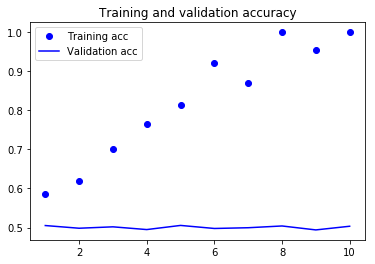

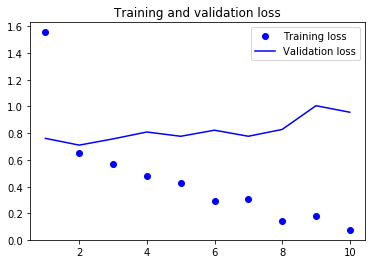

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
test_dir = os.path.join(imbd_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        # os.listdir =>>
        # Return a list containing the names of the files in the directory.
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [53]:
model.load_weights('model/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 23us/step


[0.8989134573554992, 0.52428]